In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as sns

from tqdm import tqdm
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import class_weight
import sys
import itertools


import time


sys.path.append("../1_Format_donnees/")
sys.path.append("../")
from aggregation import load_and_preprocess_agg_window, Scaler_Metrics
from evaluate import plot_confusion_matrix, get_scores

In [2]:
DEFAULT_LENGTH_Value = 60
STEP = 5

In [3]:
df_train = load_and_preprocess_agg_window("../Mesures/train", length_value = DEFAULT_LENGTH_Value, step = STEP)

df_test = load_and_preprocess_agg_window("../Mesures/test", length_value = DEFAULT_LENGTH_Value, step = STEP)
df_test


Load datasets...
Extracting ../Mesures/train\messenger20221117_125310.csv.... 1/39


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 129.86it/s]


Extracting ../Mesures/train\messenger20221124_143112.csv.... 2/39


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 37.58it/s]


Extracting ../Mesures/train\messenger20221125_130559.csv.... 3/39


100%|█████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 109.21it/s]


Extracting ../Mesures/train\messenger20221129_131204.csv.... 4/39


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 12.14it/s]


Extracting ../Mesures/train\messenger20221129_151124.csv.... 5/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.47it/s]


Extracting ../Mesures/train\messenger20230207_133921.csv.... 6/39


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.55it/s]


Extracting ../Mesures/train\messenger20230209_083453.csv.... 7/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.63it/s]


Extracting ../Mesures/train\pure_noise20230106_132210.csv.... 8/39


100%|██████████████████████████████████████████████████████████████████████████████| 805/805 [00:00<00:00, 1396.74it/s]


Extracting ../Mesures/train\skype20221129_164105.csv.... 9/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 13.81it/s]


Extracting ../Mesures/train\skype20221206_125510.csv.... 10/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 36.36it/s]


Extracting ../Mesures/train\skype20221208_104403.csv.... 11/39


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.90it/s]


Extracting ../Mesures/train\skype20221208_124925.csv.... 12/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.60it/s]


Extracting ../Mesures/train\skype20221215_151512.csv.... 13/39


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 45.06it/s]


Extracting ../Mesures/train\skype20221215_155618.csv.... 14/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 31.43it/s]


Extracting ../Mesures/train\skype20221215_164208.csv.... 15/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.44it/s]


Extracting ../Mesures/train\skype20221215_174819.csv.... 16/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 10.43it/s]


Extracting ../Mesures/train\spotify20230201_092702.csv.... 17/39


100%|█████████████████████████████████████████████████████████████████████████████| 1750/1750 [00:02<00:00, 700.50it/s]


Extracting ../Mesures/train\spotify20230203_165507.csv.... 18/39


100%|██████████████████████████████████████████████████████████████████████████████| 522/522 [00:00<00:00, 1447.03it/s]


Extracting ../Mesures/train\spotify20230216_141318.csv.... 19/39


100%|██████████████████████████████████████████████████████████████████████████████| 364/364 [00:00<00:00, 1436.90it/s]


Extracting ../Mesures/train\twitch20221117_113554.csv.... 20/39


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 114.54it/s]


Extracting ../Mesures/train\twitch20221118_075454.csv.... 21/39


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 54.24it/s]


Extracting ../Mesures/train\twitch20221125_133859.csv.... 22/39


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:01<00:00, 81.99it/s]


Extracting ../Mesures/train\twitch20230110_110215.csv.... 23/39


100%|█████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 112.79it/s]


Extracting ../Mesures/train\twitch20230110_120513.csv.... 24/39


100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 244.31it/s]


Extracting ../Mesures/train\twitch20230110_130648.csv.... 25/39


100%|███████████████████████████████████████████████████████████████████████████████| 426/426 [00:00<00:00, 761.35it/s]


Extracting ../Mesures/train\youtube20221108_165214.csv.... 26/39


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 611.57it/s]


Extracting ../Mesures/train\youtube20221108_182416.csv.... 27/39


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 333.35it/s]


Extracting ../Mesures/train\youtube20221124_125524.csv.... 28/39


100%|██████████████████████████████████████████████████████████████████████████████| 186/186 [00:00<00:00, 1258.71it/s]


Extracting ../Mesures/train\youtube20221124_154037.csv.... 29/39


100%|████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 1213.26it/s]


Extracting ../Mesures/train\youtube20221130_103723.csv.... 30/39


100%|████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 1073.02it/s]


Extracting ../Mesures/train\youtube20230110_145404.csv.... 31/39


100%|████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 1202.44it/s]


Extracting ../Mesures/train\youtube20230110_161955.csv.... 32/39


100%|████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 1119.84it/s]


Extracting ../Mesures/train\youtube20230112_125508.csv.... 33/39


100%|███████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 688.86it/s]


Extracting ../Mesures/train\youtube20230112_151029.csv.... 34/39


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 805.27it/s]


Extracting ../Mesures/train\youtube20230112_154749.csv.... 35/39


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 668.44it/s]


Extracting ../Mesures/train\youtube20230112_163634.csv.... 36/39


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 957.99it/s]


Extracting ../Mesures/train\youtube20230117_095221.csv.... 37/39


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 378.51it/s]


Extracting ../Mesures/train\youtube20230118_134041.csv.... 38/39


100%|███████████████████████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 300.20it/s]


Extracting ../Mesures/train\youtube20230124_124323.csv.... 39/39


100%|███████████████████████████████████████████████████████████████████████████████| 163/163 [00:00<00:00, 287.44it/s]


Reformat...


100%|█████████████████████████████████████████████████████████████████████████████| 5593/5593 [00:27<00:00, 204.08it/s]


Load datasets...
Extracting ../Mesures/test\messenger20221124_151137.csv.... 1/7


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 18.99it/s]


Extracting ../Mesures/test\messenger20230208_132747.csv.... 2/7


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:08<00:00,  3.33it/s]


Extracting ../Mesures/test\skype20221206_150902.csv.... 3/7


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.20it/s]


Extracting ../Mesures/test\spotify20230127_134348.csv.... 4/7


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:01<00:00, 172.83it/s]


Extracting ../Mesures/test\twitch20221124_163054.csv.... 5/7


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 20.84it/s]


Extracting ../Mesures/test\youtube20221118_104205.csv.... 6/7


100%|███████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 423.55it/s]


Extracting ../Mesures/test\youtube20230117_121925.csv.... 7/7


100%|███████████████████████████████████████████████████████████████████████████████| 260/260 [00:00<00:00, 345.37it/s]


Reformat...


100%|████████████████████████████████████████████████████████████████████████████████| 765/765 [00:16<00:00, 46.40it/s]


,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,label
20221124_151137_4_0,308.521739,687.88587,1067.25,1013.396825,1496.222222,713.52381,1561.5,899.897436,1168.0,972.756757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221124_151137_4_5,713.52381,1561.5,899.897436,1168.0,972.756757,1713.333333,630.967742,874.037351,1117.106961,1360.17657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221124_151137_4_10,1713.333333,630.967742,874.037351,1117.106961,1360.17657,1603.24618,1846.315789,696.0,638.2,580.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221124_151137_4_15,1603.24618,1846.315789,696.0,638.2,580.4,439.466667,556.0,1007.304348,965.653333,1316.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221124_151137_4_20,439.466667,556.0,1007.304348,965.653333,1316.5,1177.333333,1649.066667,1245.666667,1168.238596,1090.810526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230117_121925_263_25,2166.358632,2026.580239,1886.801846,1747.023453,1607.24506,1467.466667,913.959748,360.45283,348.902516,337.352201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230117_121925_263_30,1467.466667,913.959748,360.45283,348.902516,337.352201,325.801887,314.251572,302.701258,291.150943,279.600629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230117_121925_263_35,325.801887,314.251572,302.701258,291.150943,279.600629,268.050314,256.5,252.8,355.158974,457.517949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230117_121925_263_40,268.050314,256.5,252.8,355.158974,457.517949,559.876923,662.235897,764.594872,866.953846,969.312821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube


# Noise

In [4]:
df_train=df_train[df_train.label!="noise"]
df_test = df_test[df_test.label!="noise"]

# Scale

In [5]:
scaler = Scaler_Metrics()
training_data = scaler.fit_transform(df_train)
testing_data = scaler.transform(df_test)
training_data

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,label
id,,,,,,,,,,,,,,,,,,,,,
20221117_125310_4_0,-1.738537,-1.319589,-0.900688,-1.096900,-0.894206,-1.047165,-1.787754,-1.711869,-1.661193,-1.612499,...,-0.033654,-0.033735,-0.033648,-0.033676,-0.034741,-0.034092,-0.034146,-0.034055,-0.03402,messenger
20221117_125310_4_5,-1.040544,-1.780435,-1.710778,-1.659439,-1.613632,-1.517297,-1.448041,-1.373629,-1.319389,-1.265797,...,-0.033654,-0.033735,-0.033648,-0.033676,-0.034741,-0.034092,-0.034146,-0.034055,-0.03402,messenger
20221117_125310_4_10,-1.509698,-1.441880,-1.372560,-1.317847,-1.266399,-1.372228,-1.498598,-1.618255,-1.762929,-1.821000,...,-0.033654,-0.033735,-0.033648,-0.033676,-0.034741,-0.034092,-0.034146,-0.034055,-0.03402,messenger
20221117_125310_4_15,-1.364931,-1.492264,-1.617170,-1.761111,-1.822452,-1.747445,-1.706428,-1.659787,-1.637759,-1.618343,...,-0.033654,-0.033735,-0.033648,-0.033676,-0.034741,-0.034092,-0.034146,-0.034055,-0.03402,messenger
20221117_125310_4_20,-1.739368,-1.699386,-1.658700,-1.636019,-1.619486,-1.552160,-1.511803,-1.466006,-1.441936,-1.419714,...,-0.033654,-0.033735,-0.033648,-0.033676,-0.034741,-0.034092,-0.034146,-0.034055,-0.03402,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_166_25,-1.550007,-1.584260,-1.616959,-1.667863,-1.727078,-1.731623,-0.237341,-0.259732,-0.286273,-0.311722,...,-0.033654,-0.033735,-0.033648,-0.033676,-0.034741,-0.034092,-0.034146,-0.034055,-0.03402,youtube
20230124_124323_166_30,-1.723578,-0.235305,-0.258735,-0.285372,-0.310865,-0.330681,-0.357394,-0.686090,-1.027184,-1.377753,...,-0.033654,-0.033735,-0.033648,-0.033676,-0.034741,-0.034092,-0.034146,-0.034055,-0.03402,youtube
20230124_124323_166_35,-0.325550,-0.354949,-0.685066,-1.025824,-1.378527,-1.113211,-1.728878,-1.239867,-0.766480,-0.912087,...,-0.033654,-0.033735,-0.033648,-0.033676,-0.034741,-0.034092,-0.034146,-0.034055,-0.03402,youtube


In [6]:
data_col = training_data.columns[:-1]
X_train, X_test = training_data[data_col].values, testing_data[data_col].values
X_train, X_test = X_train.reshape((-1,DEFAULT_LENGTH_Value,2), order='F'), X_test.reshape((-1,DEFAULT_LENGTH_Value,2), order='F')
y_train, y_test = training_data.label, testing_data.label
X_train[0,:5]

array([[-1.73853749, -0.03325841],
       [-1.31958902, -0.03265063],
       [-0.90068803, -0.03257714],
       [-1.0969    , -0.03218289],
       [-0.89420568,  0.47657722]])

# Encode

In [7]:
class Encoder_label:
    corres = []
    class_weights = {}
    
    def fit(self,y):
      y_array = y_train.values
      self.corres = list(np.unique(y_array))

    def transform(self, y) :
      encoded = [self.corres.index(val) for val in y.values]
      return np.array(encoded)
    
    def fit_transform(self,y) :
      self.fit(y)
      transformed_y = self.transform(y)
      self.compute_class_weight(transformed_y)
      return transformed_y

    def inverse_transform(self,y) :
      try : 
        return np.array([self.corres[val] for val in y.values])
      except : 
        return np.array([self.corres[val] for val in y])
    
    def compute_class_weight(self, y) :
      # must receive y encoded

      self.class_weights = dict(zip(np.unique(y), class_weight.compute_class_weight(class_weight ='balanced',
                                                  classes =np.unique(y), y =y)))
    
encoder = Encoder_label()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
class_weights = encoder.class_weights
class_weights

{0: 0.672936881544817,
 1: 0.4938207197997814,
 2: 3.1495503597122303,
 3: 1.5738905740927986,
 4: 1.8654061251664447}

In [8]:
y_test_encoded

array([0, 0, 0, ..., 4, 4, 4])

# Train

In [9]:
num_steps = DEFAULT_LENGTH_Value
num_features = 2 #TBS 1 & TBS 2

In [10]:
#Deep learning model

In [11]:
time_counter = time.time_ns()

num_label = len(training_data.label.unique())
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)



model = Sequential()

model.add(LSTM(20, activation='tanh', input_shape=(num_steps, num_features), return_sequences=True))

model.add(LSTM(20, activation='tanh', input_shape=(num_steps, num_features), return_sequences=False))
#return_sequences=False because in mode many to one

model.add(Dense(num_label, activation = 'softmax'))
model.compile('adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics =['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 20)            1840      
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dense (Dense)               (None, 5)                 105       
                                                                 
Total params: 5,225
Trainable params: 5,225
Non-trainable params: 0
_________________________________________________________________


In [13]:
checkpoint_filepath = '/tmp/checkpoint/best_model'
logs_dir = 'tmp/logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs_dir)
#model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy',  mode='max',save_best_only=True)

#early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [14]:
y_test_encoded

array([0, 0, 0, ..., 4, 4, 4])

In [15]:
x_train_shaped = np.asarray(X_train).astype('float32')
x_test_shaped = np.asarray(X_test).astype('float32')
val_data = (x_test_shaped ,y_test_encoded)

checkpoint_filepath = '/tmp/checkpoint_LSTM/best_model'
logs_dir = 'tmp/logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs_dir)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy',  mode='max',save_best_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


history = model.fit(x_train_shaped, y_train_encoded, epochs=40,class_weight=class_weights, 
                    callbacks =[tensorboard_callback, early_stop,model_checkpoint_callback],
                    validation_data = val_data)


#callbacks =[tensorboard_callback, early_stop,model_checkpoint_callback],

model.load_weights(checkpoint_filepath)

training_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Training Duration : {training_duration} s for a dataset length of {len(X_train)}")


#test_predict = model.predict(x_test_shaped)

Epoch 1/40
2189/2189 [==============================] - 71s 28ms/step - loss: 0.7087 - accuracy: 0.7092 - val_loss: 1.7151 - val_accuracy: 0.4199
Epoch 2/40
2189/2189 [==============================] - 64s 29ms/step - loss: 0.5838 - accuracy: 0.7510 - val_loss: 1.6823 - val_accuracy: 0.4398
Epoch 3/40
2189/2189 [==============================] - 65s 30ms/step - loss: 0.5410 - accuracy: 0.7642 - val_loss: 1.6613 - val_accuracy: 0.4448
Epoch 4/40
2189/2189 [==============================] - 66s 30ms/step - loss: 0.5205 - accuracy: 0.7700 - val_loss: 1.6184 - val_accuracy: 0.4462
Epoch 5/40
2189/2189 [==============================] - 66s 30ms/step - loss: 0.5051 - accuracy: 0.7737 - val_loss: 1.4360 - val_accuracy: 0.4463
Epoch 6/40
2189/2189 [==============================] - 66s 30ms/step - loss: 0.4907 - accuracy: 0.7762 - val_loss: 1.4594 - val_accuracy: 0.4548
Epoch 7/40
2189/2189 [==============================] - 65s 30ms/step - loss: 0.4780 - accuracy: 0.7804 - val_loss: 1.0837 -

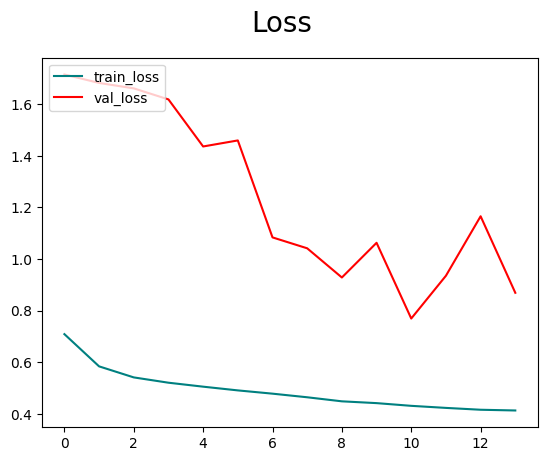

In [16]:
fig =plt.figure()
plt.plot(history.history['loss'], color ='teal', label ='train_loss')
plt.plot(history.history['val_loss'], color ='red', label ='val_loss')
fig.suptitle('Loss', fontsize =20)
plt.legend(loc ="upper left")
plt.show()

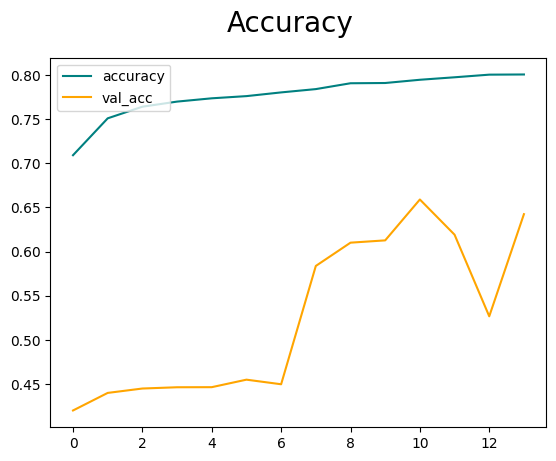

In [17]:
fig =plt.figure()
plt.plot(history.history['accuracy'], color ='teal', label ='accuracy')
plt.plot(history.history['val_accuracy'], color= 'orange', label = 'val_acc')
fig.suptitle('Accuracy', fontsize =20)
plt.legend(loc ="upper left")
plt.show()

# Evaluate on the test dataset

In [18]:
time_counter = time.time_ns()

preds_labels =  model.predict(X_test)
preds_labels = tf.math.argmax(preds_labels, axis=1)
preds_labels = encoder.inverse_transform(preds_labels)


testing_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Testing Duration : {testing_duration} s for a dataset length of {len(preds_labels)}")
testing_duration_per_item = testing_duration*(10**3)/len(preds_labels)
print(f"Testing Duration per data : {testing_duration_per_item} ms")

937/937 [==============================] - 7s 7ms/step
Testing Duration : 13.2676287 s for a dataset length of 29980
Testing Duration per data : 0.4425493228819213 ms


normalized confusion matrix


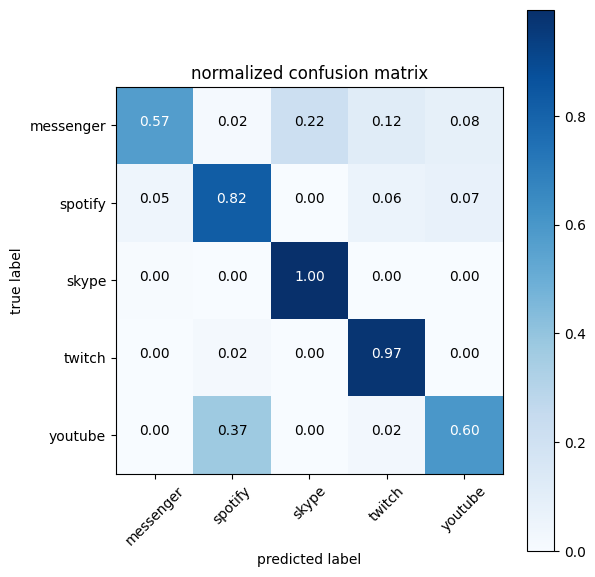

In [19]:
plot_confusion_matrix(y_test,preds_labels)

In [20]:
get_scores(y_test,preds_labels)

{'Accuracy': 0.7912908782370959,
 'Precision': 0.827370505849128,
 'Recall': 0.6590060040026684,
 'F1_Score': 0.6789480983302312,
 'support': None}